#Importing Important libs

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 

#Reading Data

In [ ]:
df = pd.read_csv ('MCSDatasetNEXTCONLab.csv')
df=df.drop(["ID"],axis=1)
print(df)

        Latitude  Longitude  Day  Hour  Minute  Duration  RemainingTime  \
0      45.442142 -75.303369    1     4      13        40             40   
1      45.442154 -75.304366    1     4      23        40             30   
2      45.442104 -75.303963    1     4      33        40             20   
3      45.441868 -75.303577    1     4      43        40             10   
4      45.447727 -75.147722    2    15      49        30             30   
...          ...        ...  ...   ...     ...       ...            ...   
14479  45.445303 -75.165596    2     1      18        20             20   
14480  45.445574 -75.165168    2     1      28        20             10   
14481  45.436682 -75.152416    0    12      21        30             30   
14482  45.436978 -75.153278    0    12      31        30             20   
14483  45.436983 -75.153240    0    12      41        30             10   

       Resources  Coverage  OnPeakHours  GridNumber  Ligitimacy  
0              9        91       

In [ ]:
data=df.iloc[:,:11] 
target=df["Ligitimacy"]
data

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380
1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380
2,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996
3,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996
4,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784
...,...,...,...,...,...,...,...,...,...,...,...
14479,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397
14480,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397
14481,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015
14482,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data , target, test_size=0.20, random_state=42)

#Define ML Models

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
ad=AdaBoostClassifier(random_state = 96)
nv = GaussianNB()
models=[rf,ad,nv]
names=["RF","AdaBoost","GaussianNB"]

#ML Models

In [ ]:
def MLModels(clf,xtr,ytr,xte,yte,name):
  Scores=[]
  clf.fit(xtr,ytr)
  Score=clf.score(xte,yte)
  pred=clf.predict(xte)
  predd=clf.predict(xtr)
  trn= ['Legitimate', 'Fake Legitimate']
  print(classification_report(yte, pred,target_names=trn))
  if name=="RF":
    print('RF Accuracy={:.2f}\n'
         .format(Score))
    Scores.append({'rf score':Score})
  elif name=="AdaBoost":
    print('AdaBoost Accuracy={:.2f}\n'
         .format(Score))
    Scores.append({'AdaBoost score':Score})
  else:
    print('GaussianNB Accuracy={:.2f}\n'
         .format(Score))
    Scores.append({'GaussianNB score':Score})  
  return Scores , predd , pred

#ML Models Results

In [ ]:
preds=[]
accuracyList = []
for i,n in zip(models, names):
  Models,predd , pred= MLModels(i,X_train,y_train,X_test,y_test,n)
  preds.append(pred)
  accuracyList.append(Models)


                 precision    recall  f1-score   support

     Legitimate       1.00      0.99      0.99       354
Fake Legitimate       1.00      1.00      1.00      2543

       accuracy                           1.00      2897
      macro avg       1.00      0.99      1.00      2897
   weighted avg       1.00      1.00      1.00      2897

RF Accuracy=1.00

                 precision    recall  f1-score   support

     Legitimate       0.87      0.74      0.80       354
Fake Legitimate       0.96      0.98      0.97      2543

       accuracy                           0.95      2897
      macro avg       0.92      0.86      0.89      2897
   weighted avg       0.95      0.95      0.95      2897

AdaBoost Accuracy=0.95

                 precision    recall  f1-score   support

     Legitimate       0.00      0.00      0.00       354
Fake Legitimate       0.88      1.00      0.93      2543

       accuracy                           0.88      2897
      macro avg       0.44      0.50  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hard Voting

In [ ]:
votPredLis =[]
def votingh():
  num= ['Legitimate', 'Fake Legitimate']
  for i , j in enumerate(preds[0]):
    if preds[0][i]+preds[1][i]+preds[2][i] >= 2:
      votPredLis.append(1)
    else:
      votPredLis.append(0)
  totalVoteAccuracy = accuracy_score(y_test, votPredLis)
  print(classification_report(y_test, votPredLis,target_names=num))
  print('Accuracy Score Voting={:.2f}\n'
            .format(totalVoteAccuracy*100))
  return totalVoteAccuracy

In [ ]:
hardacc=votingh()

                 precision    recall  f1-score   support

     Legitimate       0.93      0.98      0.95      2505
Fake Legitimate       0.98      0.93      0.95      2530

       accuracy                           0.95      5035
      macro avg       0.96      0.95      0.95      5035
   weighted avg       0.96      0.95      0.95      5035

Accuracy Score Voting=95.37



#getting trainset accuracy

In [ ]:
a=[]
classifiers = [('RF', rf),
                ('AdaBoost', ad),
                ('GaussianNB', nv)]
trn= ['Legitimate', 'Fake Legitimate']
for k,i in classifiers:
  i.fit(X_train, y_train)
  yp=i.predict(X_train)
  print(classification_report(y_train, yp,target_names=trn))
  print(i.score(X_train, y_train))
  a.append(i.score(X_train, y_train))

                 precision    recall  f1-score   support

     Legitimate       1.00      1.00      1.00     10082
Fake Legitimate       1.00      1.00      1.00     10057

       accuracy                           1.00     20139
      macro avg       1.00      1.00      1.00     20139
   weighted avg       1.00      1.00      1.00     20139

1.0
                 precision    recall  f1-score   support

     Legitimate       0.93      0.97      0.95     10082
Fake Legitimate       0.97      0.92      0.95     10057

       accuracy                           0.95     20139
      macro avg       0.95      0.95      0.95     20139
   weighted avg       0.95      0.95      0.95     20139

0.9471175331446448
                 precision    recall  f1-score   support

     Legitimate       0.68      0.86      0.76     10082
Fake Legitimate       0.81      0.59      0.68     10057

       accuracy                           0.73     20139
      macro avg       0.74      0.73      0.72     20139


#getting weightedsum


In [ ]:
Weightedsum=[]
name=["wRF","wAdaboost","wNB"]
for i,n in zip(a,name):
  Weightedsum.append({n:(i/sum(a))})

In [ ]:
Weightedsum

[{'wRF': 0.3741291868695313},
 {'wAdaboost': 0.35434431254528226},
 {'wNB': 0.2715265005851864}]

#aggregate Weights with Y predict

In [ ]:
Aggregatedop=[]
for i,j in enumerate(preds):
  newlist =[]
  for x in j:
    newlist.append(x*Weightedsum[i][name[i]])
  Aggregatedop.append(newlist)

#Aggregate Output

In [ ]:
d = [x+y+z for x, y, z in zip(Aggregatedop[0], Aggregatedop[1], Aggregatedop[2])]

#Simple Weighted

In [ ]:
l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒Lis =[]
for i in d : 
  if i > .5:
    l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒Lis.append(1)
  else:
    l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒Lis.append(0)
l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc = accuracy_score(y_test, l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒Lis)
l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc

0.9537239324726912

#Plotting Bars

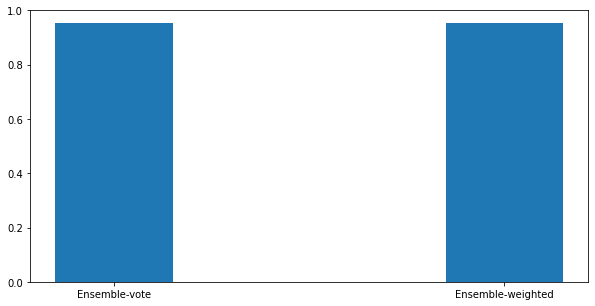

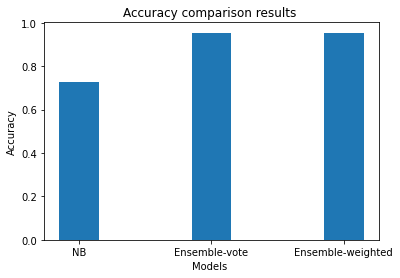

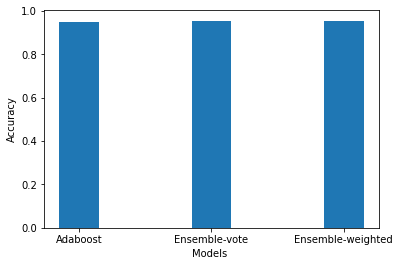

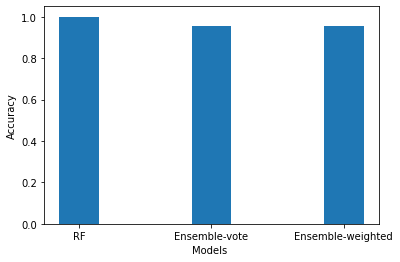

In [ ]:
###Comparing every model
fig = plt.figure(figsize = (10, 5))
labels = ['Ensemble-vote', 'Ensemble-weighted']
times = [hardacc,l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc]
plt.bar(labels,times,width = 0.3)
plt.show()
labels = ["NB" ,'Ensemble-vote', 'Ensemble-weighted']
times = [a[2],hardacc,l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc]
plt.bar(labels,times,width = 0.3)
plt.title('Accuracy comparison results ')
plt.xlabel('Models ')
plt.ylabel('Accuracy')
plt.show()
labels = ["Adaboost" ,'Ensemble-vote', 'Ensemble-weighted']
times = [a[1],hardacc,l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc]
plt.bar(labels,times,width = 0.3)
plt.xlabel('Models ')
plt.ylabel('Accuracy')
plt.show()
labels = ["RF" ,'Ensemble-vote', 'Ensemble-weighted']
times = [a[0],hardacc,l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc]
plt.bar(labels,times,width = 0.3)
plt.xlabel('Models ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
def Barplot():
  fig = plt.figure(figsize = (10, 5))
  labels = ["RF","Adaboost","NB" , 'Ensemble-vote', 'Ensemble-weighted']
  times = [a[0],a[1],a[2],hardacc,l𝑒𝑔𝑖𝑡𝑖𝑚𝑎𝑡𝑒LisAcc]
  plt.bar(labels,times,width = 0.3)
  plt.title('Accuracy comparison results ')
  plt.xlabel('Models ')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Accuracy')
  plt.show()

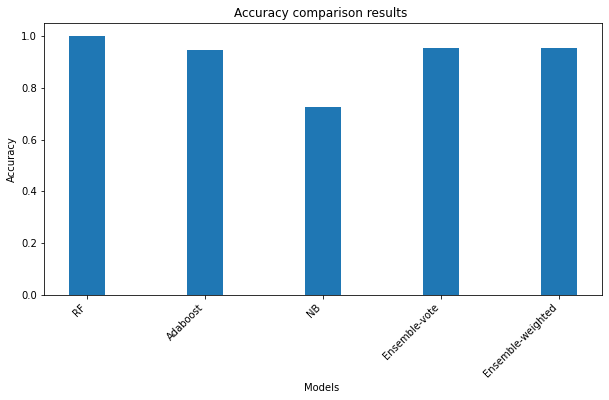

In [ ]:
Barplot()